In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading:

In [2]:
encoding_list = ['ascii','big5','big5hkscs','cp037','cp273','cp424','cp437',
                 'cp500','cp720','cp737','cp775','cp850','cp852','cp855',
                 'cp856','cp857','cp858','cp860','cp861','cp862','cp863',
                 'cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
                 'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251',
                 'cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
                 'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk',
                 'gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
                 'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr',
                 'latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
                 'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11',
                 'iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab',
                 'koi8_r','koi8_t','koi8_u','kz1048','mac_cyrillic','mac_greek',
                 'mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154',
                 'shift_jis','shift_jis_2004','shift_jisx0213','utf_32','utf_32_be',
                 'utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig']

for enc in encoding_list:
    try:
        data = pd.read_csv('../_data/Online_Retail.csv', encoding=enc)
        print(enc)
    except:
        continue

cp437
cp720
cp737
cp775
cp850
cp852
cp855
cp857
cp858
cp860
cp861
cp862
cp863
cp864
cp865
cp866
cp869
cp874
cp932
cp1006
cp1125
cp1250
cp1251
cp1252
cp1253
cp1254
cp1255
cp1256
cp1257
cp1258
latin_1
iso8859_2
iso8859_3
iso8859_4
iso8859_5
iso8859_7
iso8859_8
iso8859_9
iso8859_10
iso8859_11
iso8859_13
iso8859_14
iso8859_15
iso8859_16
koi8_r
koi8_t
koi8_u
kz1048
mac_cyrillic
mac_greek
mac_iceland
mac_latin2
mac_roman
mac_turkish
ptcp154
shift_jis
shift_jis_2004
shift_jisx0213
utf_16_be
utf_16_le


In [3]:
data = pd.read_csv('../_data/Online_Retail.csv', encoding='iso8859_2')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.isna().sum() / data.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

# Feature Extraction:

In [8]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [51]:
total_quantity = []
total_rquantity = []

cdata = data.groupby('CustomerID', group_keys=True).apply(lambda x: x)

for cid in np.unique([c[0] for c in cdata.index]):
    total_quantity.append(cdata.loc[cid]['Quantity'][cdata.loc[cid]['Quantity']>0].sum())
    total_rquantity.append(-cdata.loc[cid]['Quantity'][cdata.loc[cid]['Quantity']<0].sum())
    

total_price = []
total_rprice = []
for cid in np.unique([c[0] for c in cdata.index]):
    total_price.append(cdata.loc[cid]['TotalPrice'][cdata.loc[cid]['TotalPrice']>0].sum())
    total_rprice.append(-cdata.loc[cid]['TotalPrice'][cdata.loc[cid]['TotalPrice']<0].sum())


customer_data = pd.DataFrame({'#Invoice': data.groupby('CustomerID')['InvoiceNo'].nunique(),
                              '#Item': data.groupby('CustomerID')['StockCode'].nunique(),
                              '#Quantity': total_quantity,
                              '#RQuantity': total_rquantity,
                              'TotalPrice': total_price,
                              'TotalRPrice': total_rprice})

customer_data['MeanPrice'] = customer_data['TotalPrice'] / customer_data['#Quantity']
customer_data['MeanPrice'] = customer_data['MeanPrice'].fillna(0)

In [52]:
customer_data.isna().sum()

#Invoice       0
#Item          0
#Quantity      0
#RQuantity     0
TotalPrice     0
TotalRPrice    0
MeanPrice      0
dtype: int64

In [53]:
customer_data.describe()

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,5.075480,61.211116,1185.200366,62.856359,2038.290920,139.831219,2.990427
std,9.338754,85.425119,5037.543325,1683.595484,8956.019171,2952.494447,33.089908
min,1.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
25%,1.000000,15.000000,157.000000,0.000000,303.602500,-0.000000,1.395507
50%,3.000000,35.000000,374.500000,0.000000,665.315000,-0.000000,1.800886
75%,5.000000,77.000000,983.000000,4.000000,1652.790000,16.500000,2.346977
max,248.000000,1794.000000,197491.000000,80995.000000,280206.020000,168469.600000,2033.100000


In [112]:
Q1 = customer_data['TotalRPrice'].quantile(0.25)
Q3 = customer_data['TotalRPrice'].quantile(0.75)

IQR = Q3 - Q1

MAX = Q3 + 1.5*IQR

In [113]:
customer_data[customer_data['TotalRPrice']>MAX]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12346.0,2,1,74215,74215,77183.60,77183.60,1.040000
12352.0,11,59,536,66,2506.04,960.63,4.675448
12359.0,6,214,1622,10,6372.58,127.05,3.928841
12362.0,13,201,2229,17,5226.23,71.65,2.344652
12365.0,3,22,174,1,641.38,320.69,3.686092
...,...,...,...,...,...,...,...
18256.0,1,4,0,70,0.00,50.10,0.000000
18257.0,12,98,1041,31,2337.63,72.25,2.245562
18260.0,8,86,1478,9,2643.20,48.20,1.788363


# Data Visuallization:

In [54]:
from sklearn.decomposition import PCA

In [147]:
X_2d = PCA(n_components=2).fit_transform(scaled_data)

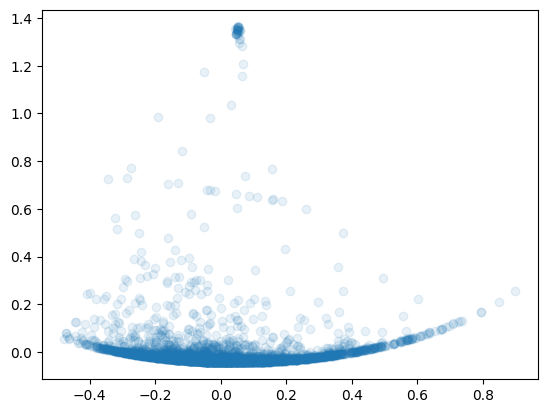

In [148]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.1);

# Clutsering:

In [73]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.metrics import calinski_harabasz_score

## K-Means:

In [59]:
from sklearn.preprocessing import MinMaxScaler, normalize

In [114]:
# scaled_data = MinMaxScaler(feature_range=(0, 1)).fit_transform(customer_data)
scaled_data = normalize(customer_data)

In [115]:
scaled_data

array([[ 1.32076231e-05,  6.60381154e-06,  4.90101873e-01, ...,
         5.09705948e-01,  5.09705948e-01,  6.86796400e-06],
       [ 1.41051867e-03,  2.07547747e-02,  4.95293555e-01, ...,
         8.68476493e-01, -0.00000000e+00,  3.53326482e-04],
       [ 1.35528192e-03,  7.45405054e-03,  7.93178742e-01, ...,
         6.08941718e-01, -0.00000000e+00,  2.60120341e-04],
       ...,
       [ 1.45531831e-02,  5.82127324e-02,  4.99659287e-01, ...,
         8.63731418e-01,  7.03403850e-03,  8.38574192e-03],
       [ 6.31983771e-03,  1.03882332e-01,  5.51800830e-01, ...,
         8.27456352e-01, -0.00000000e+00,  5.92309486e-04],
       [ 1.23565809e-03,  2.43012757e-02,  6.53251242e-01, ...,
         7.56749964e-01, -0.00000000e+00,  4.77143735e-04]])

In [118]:
K_list = []
Inertia = []
Callinski = []

for K in range(2, 30):
    cls = KMeans(n_clusters=K, n_init='auto')
    cls.fit(scaled_data)
    K_list.append(K)
    Inertia.append(cls.inertia_)
    Callinski.append(calinski_harabasz_score(X=scaled_data,
                                             labels=cls.predict(scaled_data)))
    print(K)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


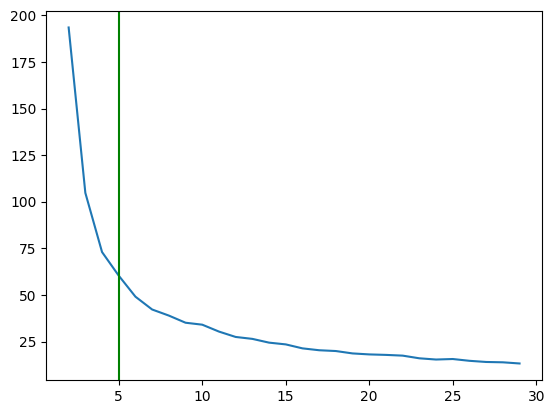

In [146]:
plt.plot(K_list, Inertia);
plt.axvline(5, c='green')

## Mean-Shift:

In [144]:
cls = MeanShift(bandwidth=0.35)
cls.fit(scaled_data)

MeanShift(bandwidth=0.35)

In [145]:
np.unique(cls.predict(scaled_data))

array([0, 1, 2])

In [143]:
for b in [0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39]:
    cls = MeanShift(bandwidth=b)
    cls.fit(scaled_data)
    print(b, calinski_harabasz_score(X=customer_data,
                                     labels=cls.predict(scaled_data)))
    

0.31 6.560189216039602
0.32 7.425755327822445
0.33 10.910614682737227
0.34 17.404411674300327
0.35 29.285564727927166
0.36 29.285564727927166
0.37 29.285564727927166
0.38 27.641330379672752
0.39 27.641330379672752


## DBSCAN:

In [199]:
cls = DBSCAN(eps=0.03, min_samples=4)
labels = cls.fit_predict(scaled_data)

In [200]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [201]:
sum(labels==-1)

358

In [202]:
customer_data.iloc[labels==0, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12347.0,7,103,2458,0,4310.00,-0.00,1.753458
12348.0,4,22,2341,0,1797.24,-0.00,0.767723
12349.0,1,73,631,0,1757.55,-0.00,2.785341
12350.0,1,17,197,0,334.40,-0.00,1.697462
12353.0,1,4,20,0,89.00,-0.00,4.450000
...,...,...,...,...,...,...,...
18280.0,1,10,45,0,180.60,-0.00,4.013333
18281.0,1,7,54,0,80.82,-0.00,1.496667
18282.0,3,12,103,5,178.05,1.45,1.728641


In [203]:
customer_data.iloc[labels==1, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
12503.0,1,1,0,1,0.0,1126.00,0.0
13154.0,1,1,0,1,0.0,611.86,0.0
15369.0,1,1,0,1,0.0,1592.49,0.0
17065.0,1,1,0,1,0.0,112.35,0.0
17448.0,1,1,0,1,0.0,4287.63,0.0


In [204]:
customer_data.iloc[labels==2, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
13532.0,1,66,129,0,210.31,-0.0,1.630310
14076.0,1,43,81,0,122.47,-0.0,1.511975
14552.0,1,57,91,0,165.07,-0.0,1.813956
15041.0,1,66,104,0,180.35,-0.0,1.734135
15054.0,2,105,198,0,302.10,-0.0,1.525758
15541.0,1,29,49,0,85.13,-0.0,1.737347
15920.0,4,53,99,0,167.50,-0.0,1.691919
17263.0,1,23,36,0,63.44,-0.0,1.762222
17619.0,1,71,127,0,218.52,-0.0,1.720630


In [205]:
customer_data.iloc[labels==3, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
13420.0,4,8,101,13,159.85,19.50,1.582673
14426.0,16,187,2699,360,4481.67,562.77,1.660493
15322.0,2,42,416,51,679.68,76.71,1.633846
15521.0,13,117,1836,162,3000.20,425.55,1.634096


In [206]:
customer_data.iloc[labels==4, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
15483.0,4,74,295,0,233.81,-0.0,0.792576
15850.0,2,87,302,0,238.85,-0.0,0.790894
17832.0,1,61,208,0,155.37,-0.0,0.746971
17962.0,1,33,128,0,102.83,-0.0,0.803359
18015.0,1,46,157,0,120.03,-0.0,0.764522


In [207]:
customer_data.iloc[labels==5, :]

,#Invoice,#Item,#Quantity,#RQuantity,TotalPrice,TotalRPrice,MeanPrice
CustomerID,,,,,,,
13230.0,15,393,1665,121,2806.97,43.56,1.685868
14502.0,14,369,1498,15,2470.67,119.65,1.649312
16330.0,4,39,147,2,251.91,9.70,1.713673
16770.0,6,116,464,12,770.10,25.20,1.659698
